In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from matplotlib.patches import Polygon
from matplotlib.colors import rgb2hex
import os

In [5]:
pwd()

'C:\\Users\\Haijin\\DataScience\\IHME'

In [59]:
# concat files for all states
g=os.walk('./mx/')
df=pd.DataFrame()
for t in g:
    for f in t[2]:
        print(f)
        df1=pd.read_csv("mx/"+f)
        df=pd.concat([df,df1[["FIPS","location_name","cause_id","cause_name","sex","year_id","mx"]]])
            

IHME_USA_COUNTY_CVD_MORTALITY_RATES_1980_2014_ALABAMA_Y2017M05D16.CSV
IHME_USA_COUNTY_CVD_MORTALITY_RATES_1980_2014_ALASKA_Y2017M05D16.CSV
IHME_USA_COUNTY_CVD_MORTALITY_RATES_1980_2014_ARIZONA_Y2017M05D16.CSV
IHME_USA_COUNTY_CVD_MORTALITY_RATES_1980_2014_ARKANSAS_Y2017M05D16.CSV
IHME_USA_COUNTY_CVD_MORTALITY_RATES_1980_2014_CALIFORNIA_Y2017M05D16.CSV
IHME_USA_COUNTY_CVD_MORTALITY_RATES_1980_2014_COLORADO_Y2017M05D16.CSV
IHME_USA_COUNTY_CVD_MORTALITY_RATES_1980_2014_CONNECTICUT_Y2017M05D16.CSV
IHME_USA_COUNTY_CVD_MORTALITY_RATES_1980_2014_DELAWARE_Y2017M05D16.CSV
IHME_USA_COUNTY_CVD_MORTALITY_RATES_1980_2014_DISTRICT OF COLUMBIA_Y2017M05D16.CSV
IHME_USA_COUNTY_CVD_MORTALITY_RATES_1980_2014_FLORIDA_Y2017M05D16.CSV
IHME_USA_COUNTY_CVD_MORTALITY_RATES_1980_2014_GEORGIA_Y2017M05D16.CSV
IHME_USA_COUNTY_CVD_MORTALITY_RATES_1980_2014_HAWAII_Y2017M05D16.CSV
IHME_USA_COUNTY_CVD_MORTALITY_RATES_1980_2014_IDAHO_Y2017M05D16.CSV
IHME_USA_COUNTY_CVD_MORTALITY_RATES_1980_2014_ILLINOIS_Y2017M05D16.CSV


In [60]:
len(df)

4359810

In [61]:
df.dtypes

FIPS             float64
location_name     object
cause_id           int64
cause_name        object
sex               object
year_id            int64
mx               float64
dtype: object

In [62]:
df.head()

,FIPS,location_name,cause_id,cause_name,sex,year_id,mx
0,1.0,Alabama,491,Cardiovascular diseases,Male,1980,674.498324
1,1.0,Alabama,491,Cardiovascular diseases,Male,1981,664.267500
2,1.0,Alabama,491,Cardiovascular diseases,Male,1982,640.969676
3,1.0,Alabama,491,Cardiovascular diseases,Male,1983,636.345490
4,1.0,Alabama,491,Cardiovascular diseases,Male,1984,630.471981


In [64]:
df_location=df[["FIPS","location_name"]].drop_duplicates()

In [65]:
len(df_location)

3194

In [71]:
states=df_location[df_location["FIPS"] < 100]

In [72]:
states.head()

,FIPS,location_name
0,1.0,Alabama
0,2.0,Alaska
0,4.0,Arizona
0,5.0,Arkansas
0,6.0,California


In [73]:
obesity=pd.read_csv("state_obesity.csv")

In [74]:
obesity.head()

,State,Obesity
0,West Virginia,37.7
1,Mississippi,37.3
2,Alabama,35.7
3,Arkansass,35.7
4,Louisiana,35.5


In [75]:
df2=df[ (df["FIPS"] < 100) & (df["sex"]=="Male") & (df["year_id"]==2012) & (df["cause_id"]==491) ]

In [76]:
len(df2)

51

In [78]:
df3=df2.merge(obesity, left_on="location_name", right_on="State")

In [80]:
df3.columns.values

array(['FIPS', 'location_name', 'cause_id', 'cause_name', 'sex', 'year_id',
       'mx', 'State', ' Obesity'], dtype=object)

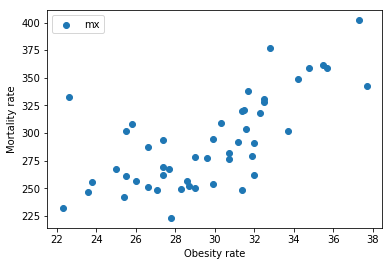

In [88]:
plt.scatter(df3[" Obesity"],df3["mx"])
plt.xlabel("Obesity rate")
plt.ylabel("Mortality rate")
plt.legend()
plt.show()

In [ ]:
# there seems a correlation, especially when obesite rate is high.